In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn-v0_8')  # Using a specific seaborn style version
sns.set_theme()  # Set seaborn theme


In [4]:
# Create output directory for visualizations
output_dir = Path("visualizations")
output_dir.mkdir(exist_ok=True)


In [5]:
print("Loading data...")
behav = pd.read_csv("QVI_purchase_behaviour.csv")
transac = pd.read_excel("QVI_transaction_data.xlsx")


Loading data...


In [6]:
# Basic data information
print("\n[[[[[[[[[[[[[[       Purchase Behavior Data Info        ]]]]]]]]]]]]]\n")
print(behav.info())
print("\n[[[[[[[[[[[[[[      First 10 rows of Purchase Behavior Data:      ]]]]]]]]]]]]]]")
behav.head(10)


[[[[[[[[[[[[[[       Purchase Behavior Data Info        ]]]]]]]]]]]]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

[[[[[[[[[[[[[[      First 10 rows of Purchase Behavior Data:      ]]]]]]]]]]]]]]


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [7]:
# LYLTY_CARD_NBR will be used a unique identifier
behav.drop_duplicates("LYLTY_CARD_NBR")
behav.dropna(inplace=True)
behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# Create customer segment analysis
customer_segments = pd.crosstab(behav['LIFESTAGE'], behav['PREMIUM_CUSTOMER'])
print("\nCustomer Segments Analysis:")
customer_segments


Customer Segments Analysis:


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


In [9]:
# Customer Analysis
print("\n[[[[[[[[[[[[[[      Customer Analysis      ]]]]]]]]]]]]]]")
print("\nTotal number of customers:")
print(len(behav))
print("\n[[[[[[[[[[[[[[      Customer Lifestage Distribution:      ]]]]]]]]]]]]]]\n")
print(behav['LIFESTAGE'].value_counts())
print("\n[[[[[[[[[[[[[[      Customer Premium Status Distribution:      ]]]]]]]]]]]]]]\n")
premium_customers = behav['PREMIUM_CUSTOMER'].value_counts()
premium_customers


[[[[[[[[[[[[[[      Customer Analysis      ]]]]]]]]]]]]]]

Total number of customers:
72637

[[[[[[[[[[[[[[      Customer Lifestage Distribution:      ]]]]]]]]]]]]]]

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

[[[[[[[[[[[[[[      Customer Premium Status Distribution:      ]]]]]]]]]]]]]]



PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [10]:
print("\n[[[[[[[[[[[[[[      Transaction Data Info      ]]]]]]]]]]]]]]\n")
print(transac.info())
print("\n[[[[[[[[[[[[[[      First 10 rows of Transaction Data:      ]]]]]]]]]]]]]]")
transac.head(10)


[[[[[[[[[[[[[[      Transaction Data Info      ]]]]]]]]]]]]]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None

[[[[[[[[[[[[[[      First 10 rows of Transaction Data:      ]]]]]]]]]]]]]]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [11]:
# Changing the date format
transac["DATE"] = pd.to_datetime(transac["DATE"], origin = '1899-12-30', unit ='D')


In [12]:
transac.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [13]:
# Clean product names by removing special characters and digits
transac['PROD_NAME'] = transac['PROD_NAME'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
transac['PROD_NAME'] = transac['PROD_NAME'].str.replace(r'\d+', '', regex=True)
print("\nSample of cleaned product names:")
print(transac['PROD_NAME'].head())


Sample of cleaned product names:
0     Natural Chip        Compny SeaSaltg
1                   CCs Nacho Cheese    g
2     Smiths Crinkle Cut  Chips Chicken g
3       Smiths Chip Thinly  SCreamOnion g
4    Kettle Tortilla ChpsHnyJlpno Chili g
Name: PROD_NAME, dtype: object


In [14]:
# Remove 'g' from the end of product names
transac['PROD_NAME'] = transac['PROD_NAME'].str.replace(r'g$', '', regex=True)
print("\nSample of product names after removing trailing 'g':")
transac['PROD_NAME'].head()


Sample of product names after removing trailing 'g':


0     Natural Chip        Compny SeaSalt
1                   CCs Nacho Cheese    
2     Smiths Crinkle Cut  Chips Chicken 
3       Smiths Chip Thinly  SCreamOnion 
4    Kettle Tortilla ChpsHnyJlpno Chili 
Name: PROD_NAME, dtype: object

In [15]:
# Filter transactions to only include products with 'chip' or 'chips'
chip_mask = transac['PROD_NAME'].str.contains('chip', case=False)
transac = transac[chip_mask]

print("\nDataset filtered to only include chip products")
print(f"Number of transactions remaining: {len(transac)}")
print("\nSample of chip products:")
print(transac['PROD_NAME'].head())



Dataset filtered to only include chip products
Number of transactions remaining: 74570

Sample of chip products:
0     Natural Chip        Compny SeaSalt
2     Smiths Crinkle Cut  Chips Chicken 
3       Smiths Chip Thinly  SCreamOnion 
6    Smiths Crinkle Chips Salt  Vinegar 
8    Doritos Corn Chip Mexican Jalapeno 
Name: PROD_NAME, dtype: object


In [16]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74570 entries, 0 to 264834
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            74570 non-null  datetime64[ns]
 1   STORE_NBR       74570 non-null  int64         
 2   LYLTY_CARD_NBR  74570 non-null  int64         
 3   TXN_ID          74570 non-null  int64         
 4   PROD_NBR        74570 non-null  int64         
 5   PROD_NAME       74570 non-null  object        
 6   PROD_QTY        74570 non-null  int64         
 7   TOT_SALES       74570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 5.1+ MB


In [17]:
Sales_by_Period = transac.iloc[:, [0,7]].groupby("DATE").sum().sort_values("DATE", ascending=True).reset_index()

In [18]:
Sales_by_Period['DATE'] = pd.to_datetime(Sales_by_Period['DATE'])
Sales_by_Period['Year Month'] = Sales_by_Period['DATE'].dt.to_period('M').astype(str)
Sales_by_Period['Month'] = Sales_by_Period['DATE'].dt.strftime('%B')

In [19]:
Sales_by_Period.head(10)
Sales_by_Period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        364 non-null    datetime64[ns]
 1   TOT_SALES   364 non-null    float64       
 2   Year Month  364 non-null    object        
 3   Month       364 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.5+ KB


In [20]:
# Create a complete date range from Jul 1 2018 to Jun 30 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Convert date_range to dataframe
date_df = pd.DataFrame({'DATE': date_range})

# Merge with Sales_by_Period to identify missing dates
complete_sales = pd.merge(date_df, Sales_by_Period, on='DATE', how='left')

# Fill missing values with 0
complete_sales = complete_sales.fillna(0)

# Find missing dates
missing_dates = complete_sales[complete_sales['TOT_SALES'] == 0]['DATE']

print("\nMissing dates in the dataset:")
print(missing_dates.dt.strftime('%Y-%m-%d').tolist())



Missing dates in the dataset:
['2018-12-25']


In [21]:
# Create a complete date range from Jul 1 2018 to Jun 30 2019
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

# Convert date_range to dataframe
date_df = pd.DataFrame({'DATE': date_range})

# Merge with Sales_by_Period to include all dates
Sales_by_Period = pd.merge(date_df, Sales_by_Period, on='DATE', how='left')

# Fill missing values with 0
Sales_by_Period = Sales_by_Period.fillna(0)

# Re-calculate Year Month and Month columns for any new rows
Sales_by_Period['Year Month'] = Sales_by_Period['DATE'].dt.to_period('M').astype(str)
Sales_by_Period['Month'] = Sales_by_Period['DATE'].dt.strftime('%B')


In [22]:
Sales_by_Period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        365 non-null    datetime64[ns]
 1   TOT_SALES   365 non-null    float64       
 2   Year Month  365 non-null    object        
 3   Month       365 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 11.5+ KB


In [23]:
monthly_sales = Sales_by_Period.groupby(['Year Month', 'Month'])["TOT_SALES"].sum().reset_index()

In [24]:
monthly_sales.head(12)

,Year Month,Month,TOT_SALES
0,2018-07,July,44494.3
1,2018-08,August,41508.7
2,2018-09,September,42034.7
3,2018-10,October,44230.7
4,2018-11,November,41804.8
5,2018-12,December,44754.3
6,2019-01,January,43051.4
7,2019-02,February,39449.6
8,2019-03,March,43823.1
9,2019-04,April,42194.0


In [25]:
# Join behavior and transaction data
combined_data = pd.merge(transac, behav, on='LYLTY_CARD_NBR', how='inner',validate = "m:1")

In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74570 entries, 0 to 74569
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              74570 non-null  datetime64[ns]
 1   STORE_NBR         74570 non-null  int64         
 2   LYLTY_CARD_NBR    74570 non-null  int64         
 3   TXN_ID            74570 non-null  int64         
 4   PROD_NBR          74570 non-null  int64         
 5   PROD_NAME         74570 non-null  object        
 6   PROD_QTY          74570 non-null  int64         
 7   TOT_SALES         74570 non-null  float64       
 8   LIFESTAGE         74570 non-null  object        
 9   PREMIUM_CUSTOMER  74570 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 5.7+ MB


In [27]:
# Calculate total sales and percentages by customer segments
sales_by_segment = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales = sales_by_segment['TOT_SALES'].sum()
sales_by_segment['Sales_Percentage'] = (sales_by_segment['TOT_SALES'] / total_sales * 100).round(2)

# Create pivot table with both total sales and percentages
sales_pivot = pd.pivot_table(sales_by_segment, 
                           values=['TOT_SALES', 'Sales_Percentage'],
                           index='LIFESTAGE',
                           columns='PREMIUM_CUSTOMER')

# Display combined results
print("\nCustomer Segment Analysis - Total Sales ($) and Percentage Contribution (%):")
print(sales_pivot)



Customer Segment Analysis - Total Sales ($) and Percentage Contribution (%):
                       Sales_Percentage                    TOT_SALES  \
PREMIUM_CUSTOMER                 Budget Mainstream Premium    Budget   
LIFESTAGE                                                              
MIDAGE SINGLES/COUPLES             1.92       4.68    3.00    9838.3   
NEW FAMILIES                       1.10       0.84    0.60    5651.4   
OLDER FAMILIES                     8.77       5.53    4.15   44859.2   
OLDER SINGLES/COUPLES              7.03       6.93    6.75   35943.0   
RETIREES                           5.87       7.93    4.85   30051.8   
YOUNG FAMILIES                     7.24       4.95    4.45   37064.1   
YOUNG SINGLES/COUPLES              3.28       7.83    2.27   16777.1   

                                            
PREMIUM_CUSTOMER       Mainstream  Premium  
LIFESTAGE                                   
MIDAGE SINGLES/COUPLES    23950.4  15349.4  
NEW FAMILIES         

In [28]:
# Check for unmatched transactions by comparing original transaction count with merged count
print("Original transaction count:", len(transac))
print("Merged transaction count:", len(combined_data))
print("Number of unmatched transactions:", len(transac) - len(combined_data))


Original transaction count: 74570
Merged transaction count: 74570
Number of unmatched transactions: 0


### General Visualizations

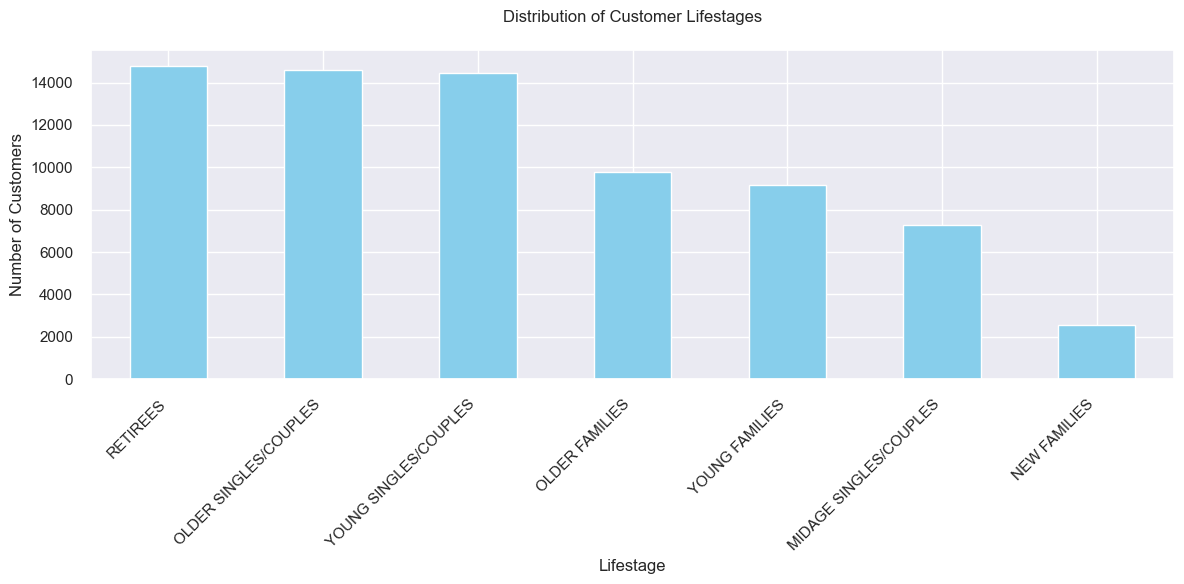

In [29]:
# Customer Lifestage Distribution
CustDist = plt.figure(figsize=(12, 6))
lifestages = CustDist.add_subplot(1,1,1)
behav['LIFESTAGE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Lifestages', pad=20)
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(output_dir / 'lifestage_distribution.png', dpi=300, bbox_inches='tight')
plt.show() # Add this to display the plot
plt.close()

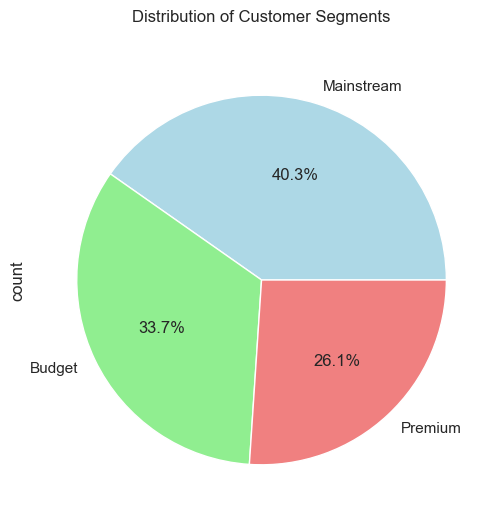

In [30]:
# Premium Customer Distribution
plt.figure(figsize=(10, 6))
behav['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Customer Segments', pad=20)
plt.savefig(output_dir / 'premium_distribution.png', dpi=300, bbox_inches='tight')
plt.show() # Add this to display the plot
plt.close()


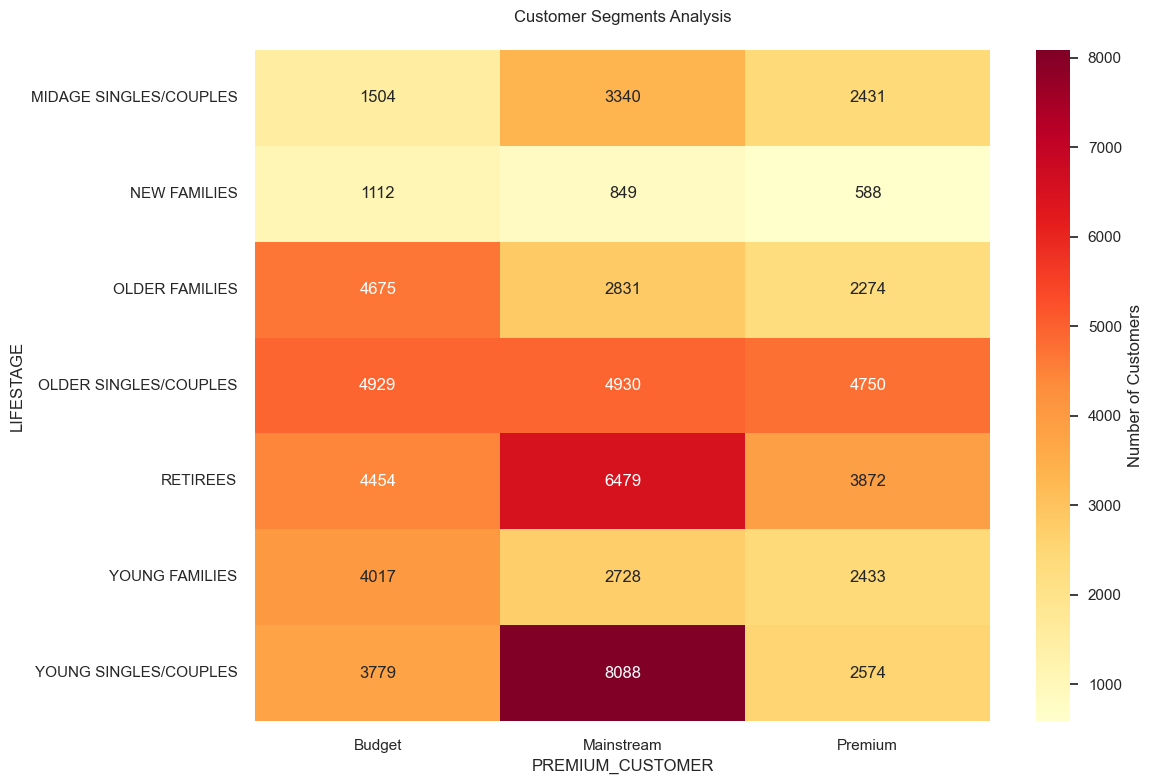

In [31]:
# Customer Segments Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(customer_segments, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Customers'})
plt.title('Customer Segments Analysis', pad=20)
plt.tight_layout()
plt.savefig(output_dir / 'customer_segments_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



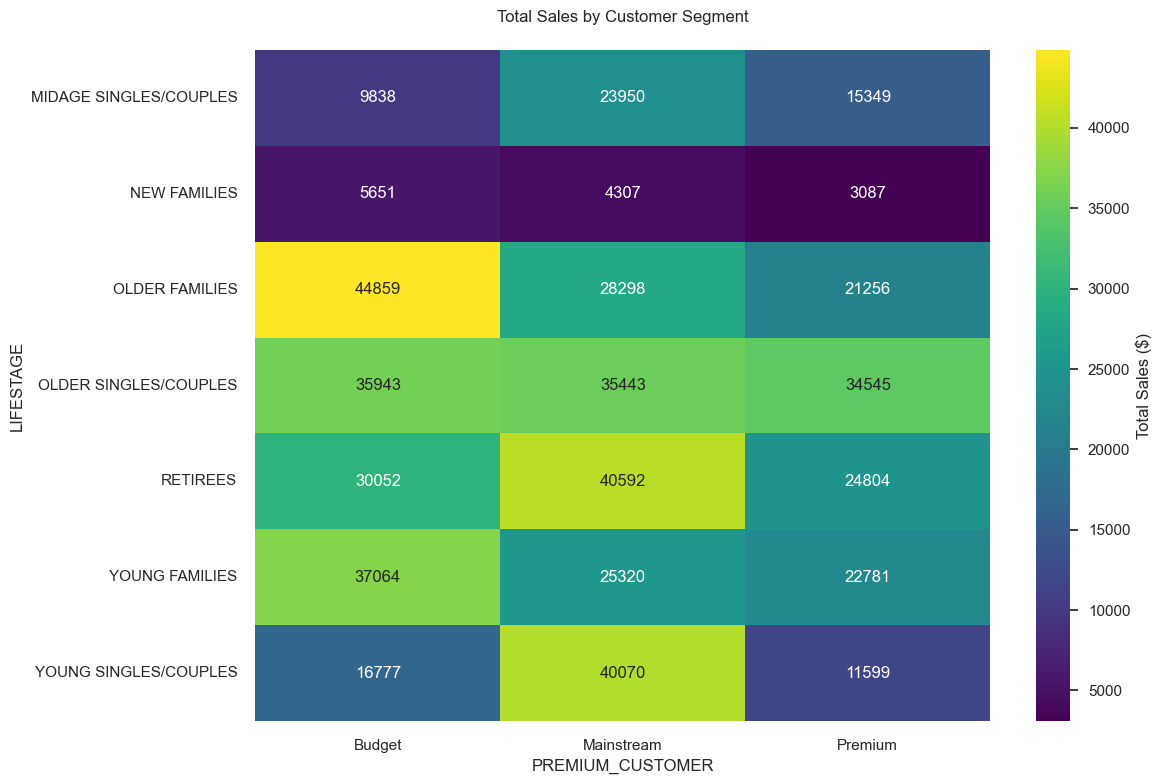

In [32]:
# Sales by Segment Heatmap
segment_sales = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(segment_sales, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'Total Sales ($)'})
plt.title('Total Sales by Customer Segment', pad=20)
plt.tight_layout()
plt.savefig(output_dir / 'sales_by_segment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


<Figure size 1200x600 with 0 Axes>

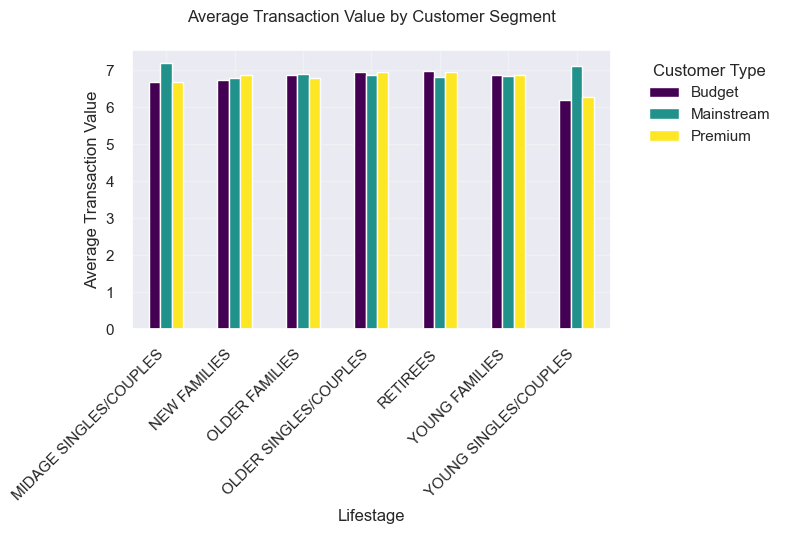

In [35]:
# Average Transaction Value by Customer Segment
merged_data = pd.merge(transac, behav, on='LYLTY_CARD_NBR', how='left')
avg_transaction = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack()

plt.figure(figsize=(12, 6))
avg_transaction.plot(kind='bar', colormap='viridis')
plt.title('Average Transaction Value by Customer Segment', pad=20)
plt.xlabel('Lifestage')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'avg_transaction_by_segment.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

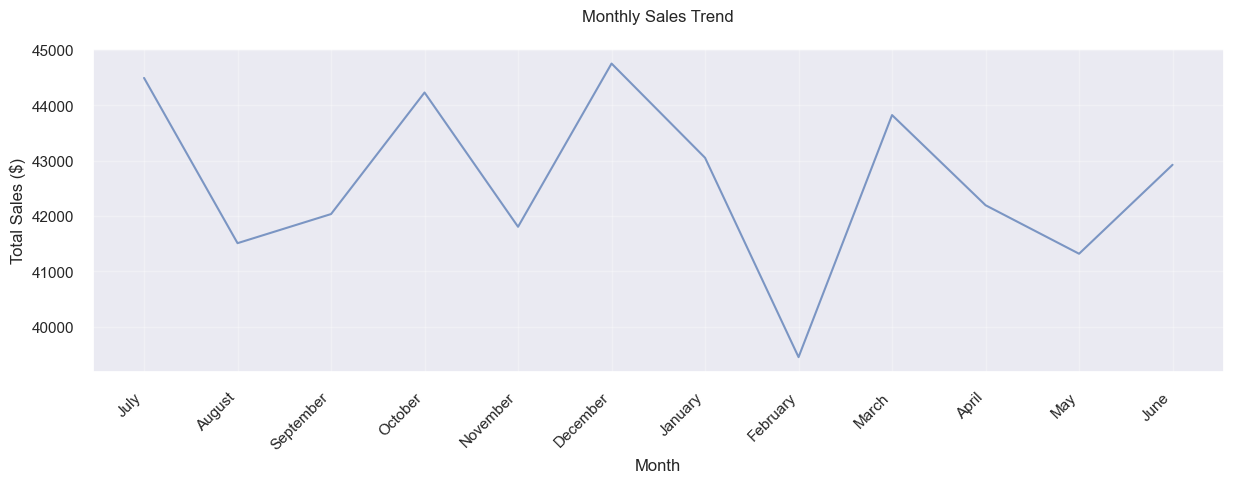

In [34]:
# Monthly Sales Analysis
salesPlot = plt.figure(figsize = (12.5,5))
sales_in_months = salesPlot.add_subplot(1,1,1)
sales_in_months.plot(monthly_sales["Month"],monthly_sales["TOT_SALES"], 'b', alpha = 0.7, )
plt.title('Monthly Sales Trend', pad=20)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'monthly_sales.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
